# European Options - Binomial Model 

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def nCk(n, k):
    return np.math.factorial(n) / (np.math.factorial(n-k)*np.math.factorial(k))


def binomial(S0, K , T, r, sigma, N):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt) - d)  /  (u - d)
    Vc = 0 
    for k in range(N+1):
        p_k = nCk(N, k)*p**k * (1-p)**(N-k)
        S_k = S0*(u)**(2*k-N)
        Vc += max(S_k-K,0) * p_k
    
    return Vc*np.exp(-r*T)

# Parameters
S = 100
K = 100
T = 1
sigma = 0.2
r = 0.04
N = 30

# Get option prices
Vc = binomial(S, K, T, r,sigma, N) # call
Vp = K*np.exp(-r*T) + Vc - S # put with put-call parity

print('Call price: ' + str(round(Vc, 5)))
print('Put price:  ' + str(round(Vp, 5)))

Call price: 9.85902
Put price:  5.93797


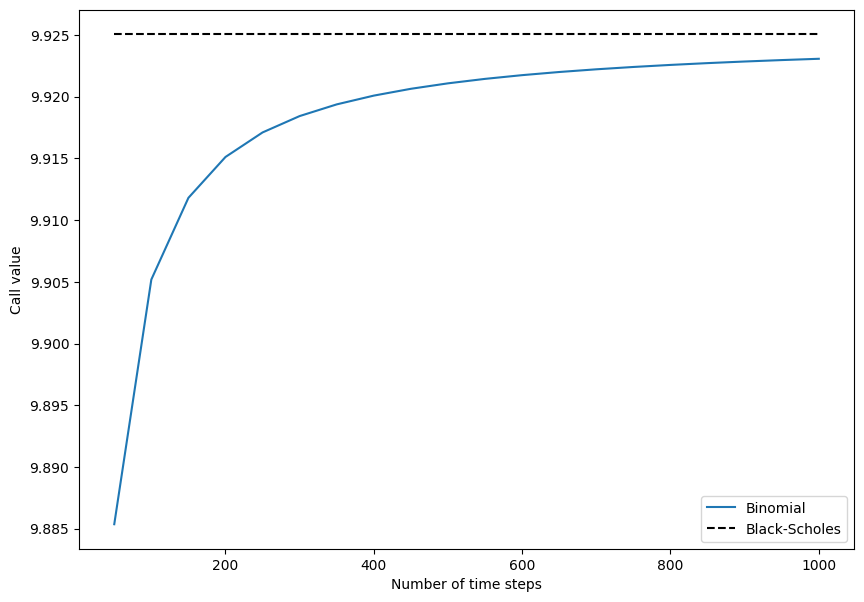

In [5]:
# Function for pricing call with Black-Scholes analytical formula 
def bs_analytical(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S/K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    # Calculates call and put values
    Vc = S * norm.cdf(d1) - K * np.exp(-r * (T)) * norm.cdf(d2)
    return Vc    

# BS call price
Vc_bs = bs_analytical(S, K, T, r, sigma)

# Call price from binomial model for different numbers of time steps
Vc_bin = []
for i in range(1, 21):
    Vc_bin.append(binomial(S, K, T, r,sigma, i*50))

# Plot 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(np.array(range(1, 21))*50, Vc_bin, label='Binomial')
ax.hlines(Vc_bs, 50, 1000, color='k', linestyle='--', label='Black-Scholes')
ax.set_ylabel('Call value')
ax.set_xlabel('Number of time steps')
ax.legend(loc='lower right');

# Black Scholes Model - Analytical 

<IPython.core.display.Javascript object>


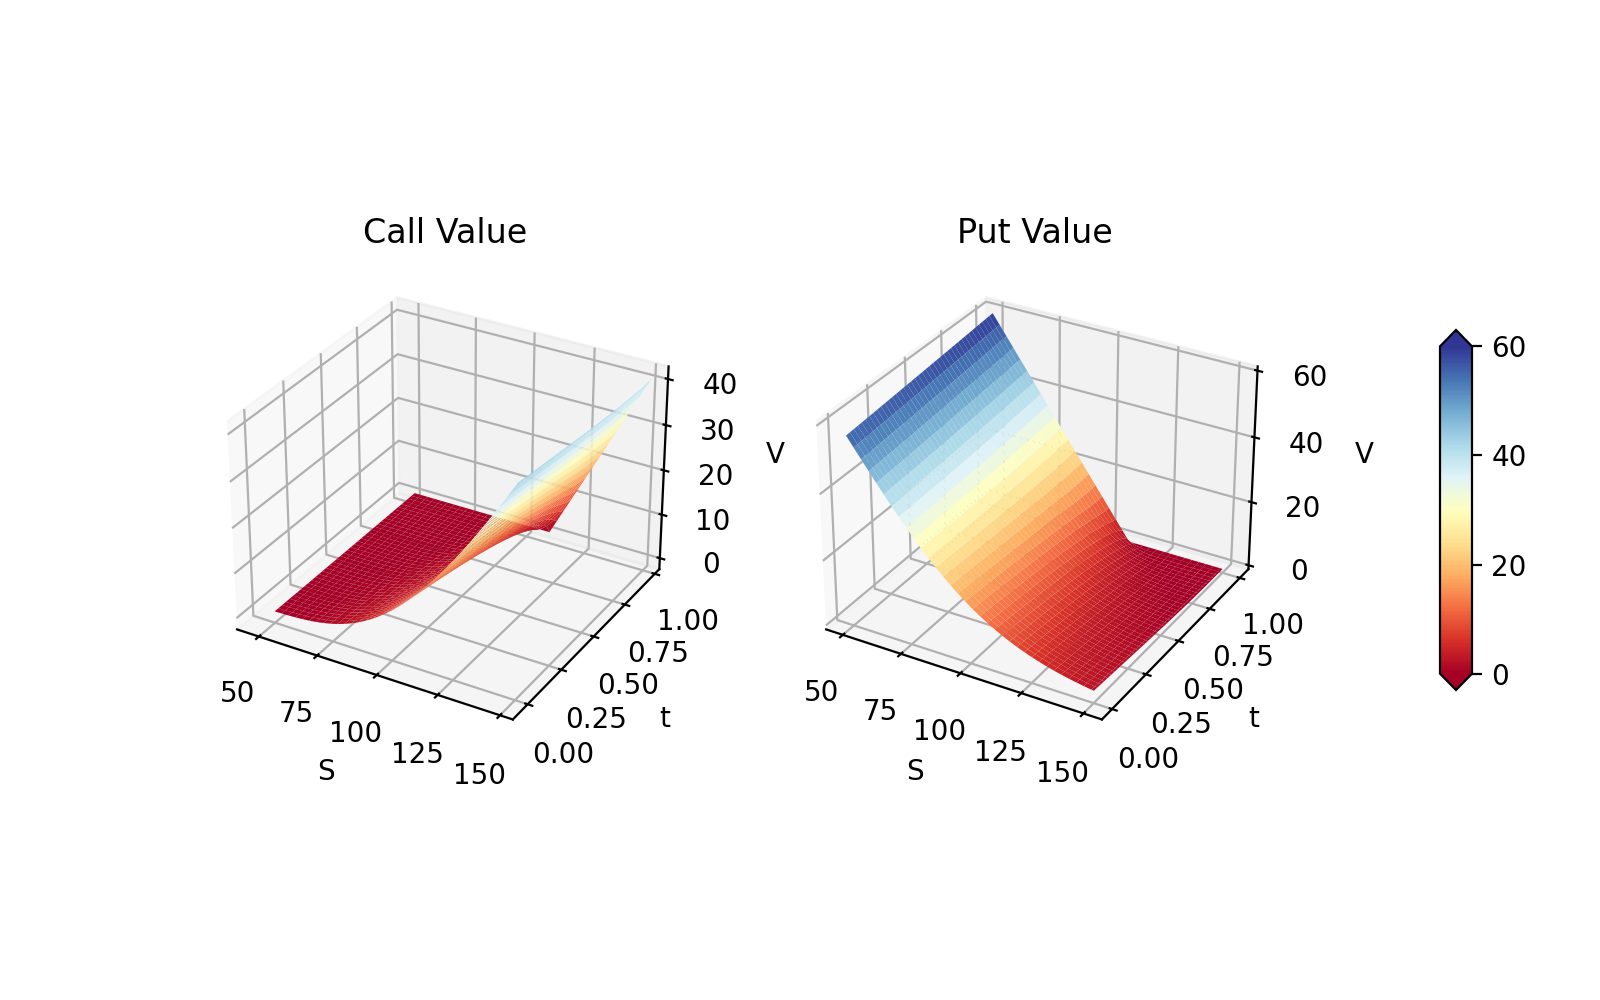

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# Interactive plots
%matplotlib notebook

# Parameters
T = 1         # Maturity
K = 110       # Strike
r = 0.05      # Interest Rate
q = 0.03      # Dividend Rate
sigma = 0.3   # Volatility

# Creates ranges for S and t values
S = np.arange(50, 151, 1)
t = np.arange(0, 1.025, 0.025)
S, t = np.meshgrid(S, t)

# Calculates d1 and d2 values
with np.errstate(divide='ignore', invalid='ignore'):
    d1 = (np.log(S/K) + (r-q + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = (np.log(S/K) + (r-q - 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))

# Calculates call and put values
V_Call = S * np.exp(-q * (T-t)) * norm.cdf(d1) - K * np.exp(-r * (T-t)) * norm.cdf(d2)
V_Put = K * np.exp(-r * (T-t)) * norm.cdf(-d2) - S * np.exp(-q * (T-t)) * norm.cdf(-d1)

# Changes nan values to 0
V_Call = np.nan_to_num(V_Call,nan=0.0)
V_Put = np.nan_to_num(V_Put,nan=0.0)

# Creates the figure and the Call surface
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(S, t, V_Call, cmap = cm.RdYlBu, vmax=max(V_Call.max(), V_Put.max()))
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('V')
ax.set_title('Call Value')

# Creates the Put surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(S, t, V_Put, cmap = cm.RdYlBu, vmax=max(V_Call.max(), V_Put.max()))
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('V')
ax.set_title('Put Value')

# Adds the colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.31, 0.02, 0.36])
fig.colorbar(surf, cax=cbar_ax, extend='both');

# MONTE CARLO

<IPython.core.display.Javascript object>


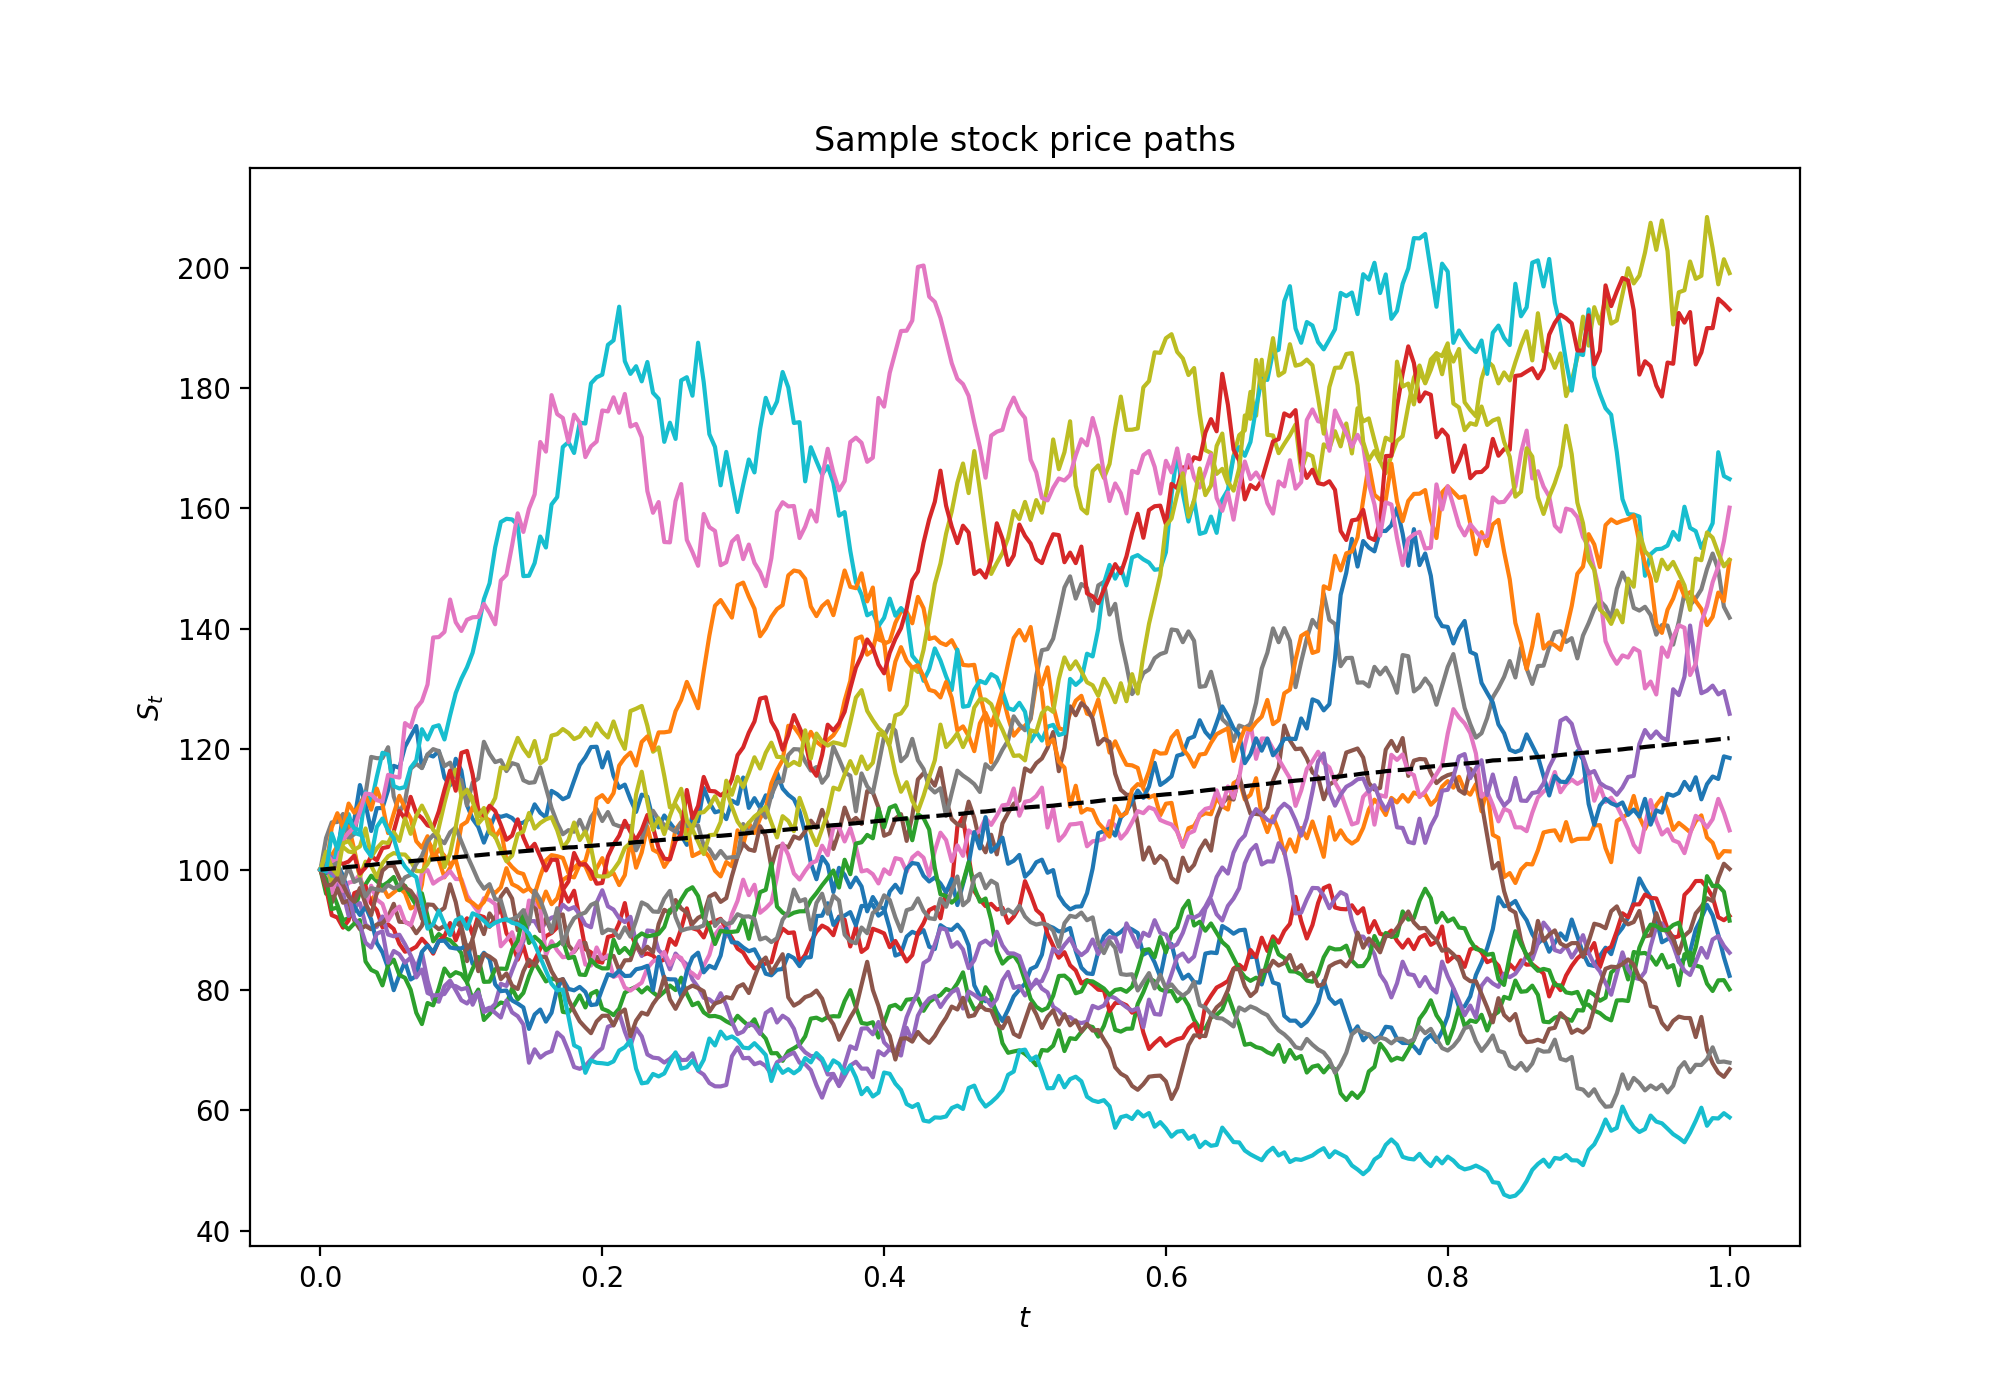

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# # Parameters
mu = 0.2        # mean
sigma = 0.4     # standard deviation
npaths = 20000  # number of paths
nsteps = 250    # number of time steps
npathsplot = 20 # number of paths ploted
T = 1           # time horizon
dt = T/nsteps   # time step
S0 = 100        # Initial stock price

t = np.linspace(0, T, nsteps+1) # time grid

# Compute the increments of the arithmetic brownian motion X = log(S/S0)
dX = (mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.normal(size=(npaths, nsteps))

# Accumulate the increments starting at 0
X = np.concatenate((np.zeros((npaths, 1)), np.cumsum(dX, axis=1)), axis=1)

# Transform to geometric Brownian motion
S = S0*np.exp(X)

# Plot potential stock price paths
fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111)
for i in range(0, npaths, round(npaths/npathsplot)):
    ax.plot(t, S[i,:])
ax.plot(t, np.mean(S, axis=0), 'k--') # mean path
ax.set_title('Sample stock price paths')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$S_t$');

In [10]:
# distribution of the stock price at maturity and fit a lognormal distribution.

<IPython.core.display.Javascript object>


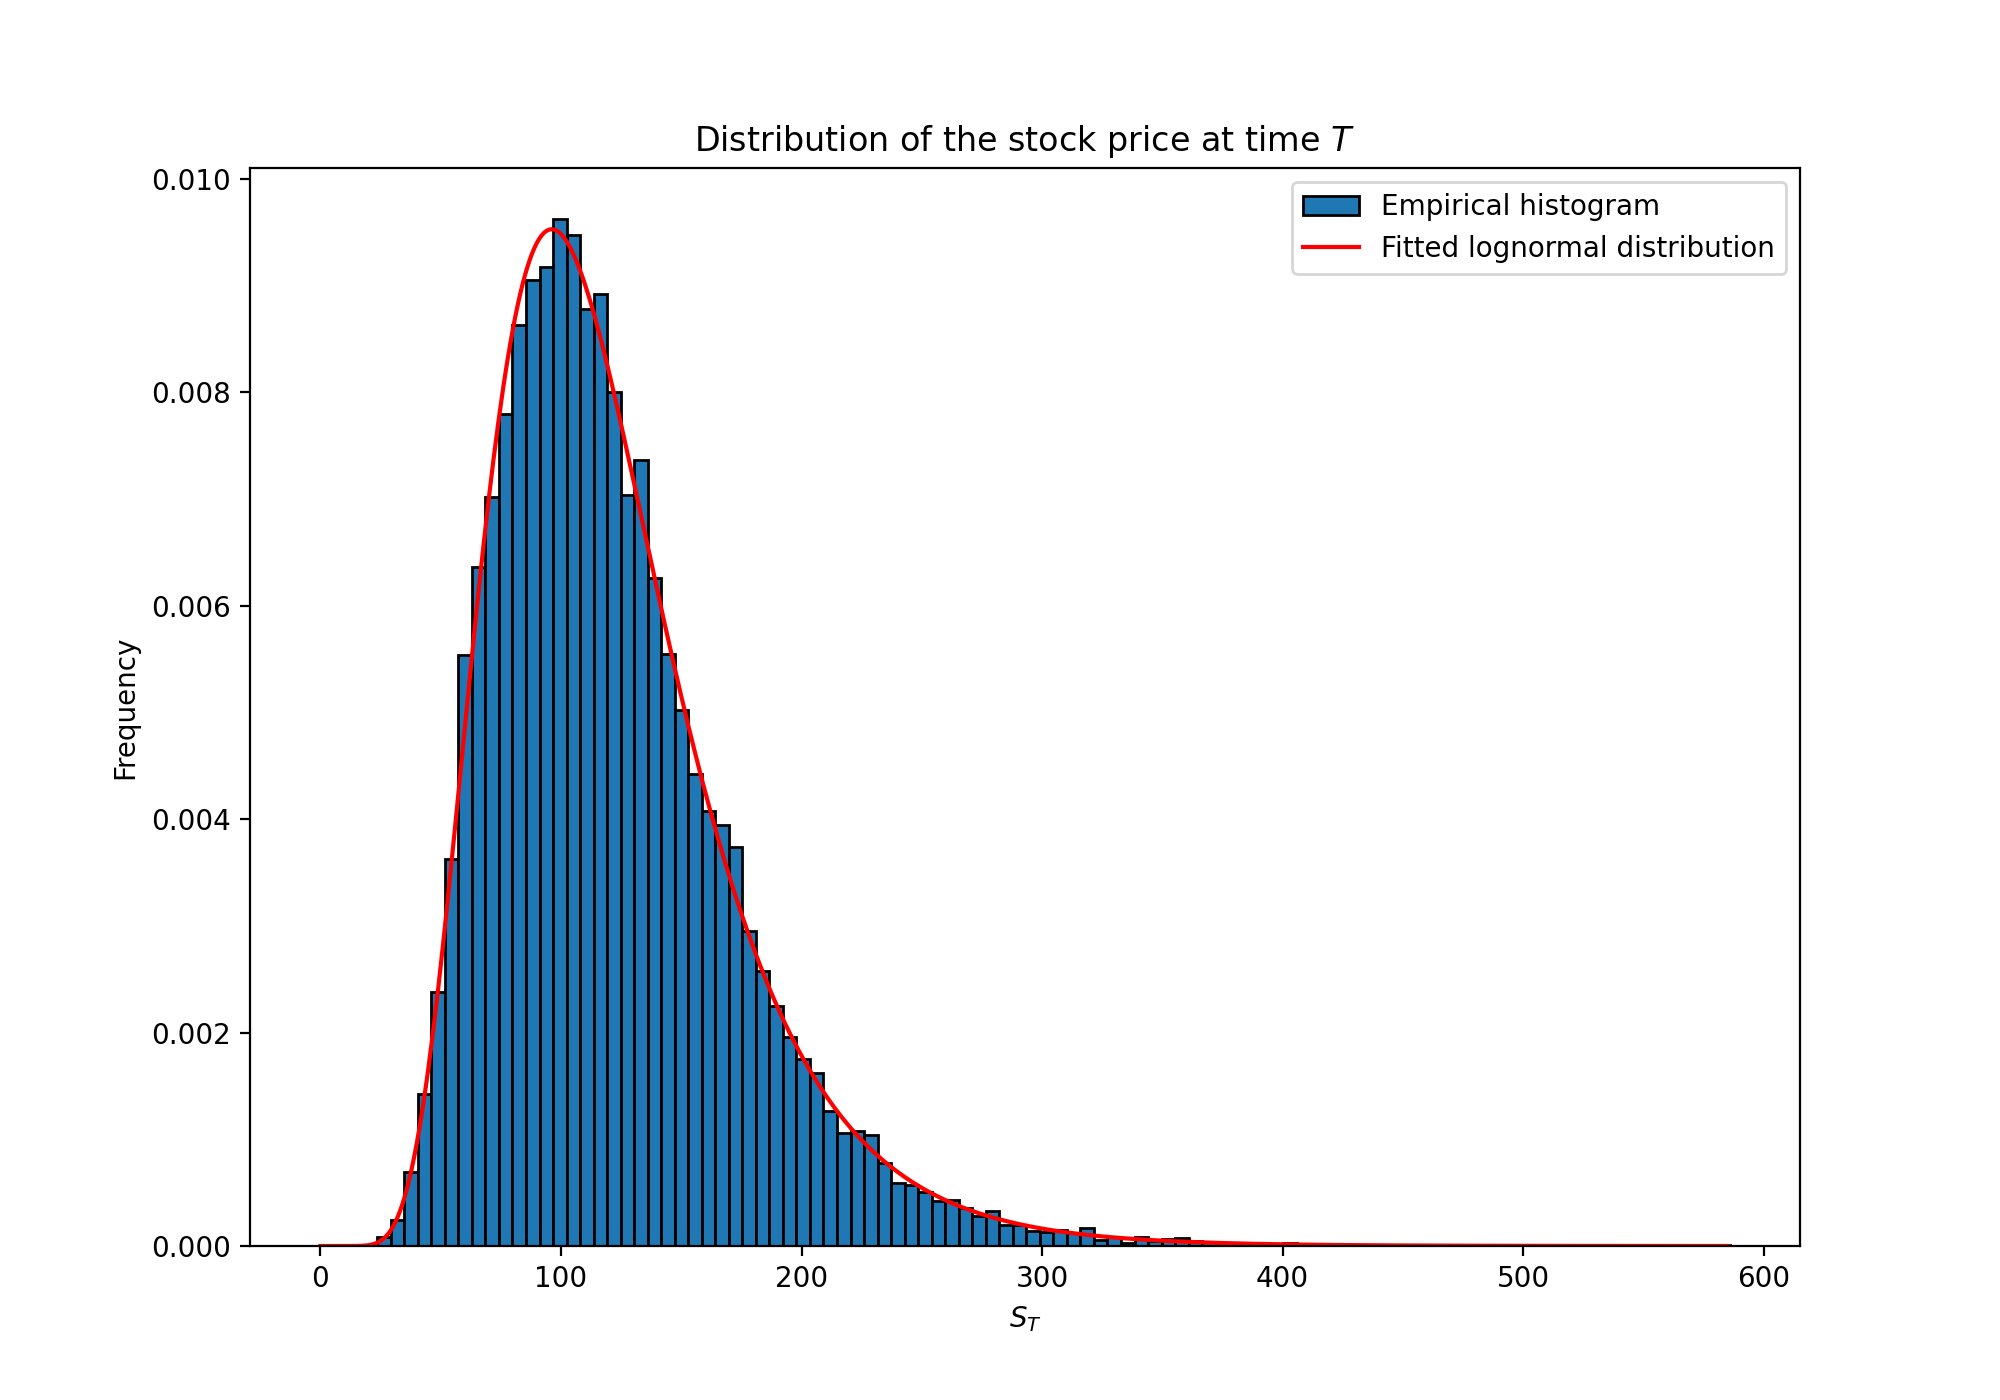

In [12]:
# Plot the distribution of the stock price at maturity
fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111)
ax.hist(S[:,-1], 100, density=True, ec='k', label='Empirical histogram')
ax.set_title(r'Distribution of the stock price at time $T$')
ax.set_xlabel(r'$S_T$')
ax.set_ylabel('Frequency')

# Fit a lognormal distribution
S_grid = range(int(S[:,-1].max())+1)
params = st.lognorm.fit(S[:,-1], scale=100)
pdf = st.lognorm.pdf(S_grid, *params)
ax.plot(S_grid, pdf, 'r', label='Fitted lognormal distribution')
ax.legend();

In [13]:
# PRICING THE OPTIONS 

In [15]:
# Market parameters
T = 1      # maturity
S0 = 1     # spot price
K = 1.1    # strike price
r = 0.05   # risk-free interest rate
q = 0.02   # dividend rate

# Model parameter
sigma = 0.4 # volatility

# Risk-neutral measure
muRN = r-q-0.5*sigma**2 # drift

# Monte Carlo parameters; npaths = nblocks*nsample
nblocks = 20000 # number of blocks
nsample = 10000 # number of samples per block

# Initialize arrays
Vc_list = np.zeros(nblocks) # call array
Vp_list = np.zeros(nblocks) # put array

# Monte Carlo
for i in range(nblocks):
    X = muRN*T + sigma*np.sqrt(T) * np.random.normal(size=(1, nsample))
    S = S0*np.exp(X)
    Vc_list[i] = np.exp(-r*T)*np.mean(np.maximum(S - K, 0))
    Vp_list[i] = np.exp(-r*T)*np.mean(np.maximum(K - S, 0))

# Final call and put values
Vc = np.mean(Vc_list)
Vp = np.mean(Vp_list)

print('The value of the call is: ' + str(round(Vc, 5)))
print('The value of the put is:  ' + str(round(Vp, 5)))

The value of the call is: 0.12965
The value of the put is:  0.19582


# HESTON MODEL - ANALYTICAL 

In [17]:
import numpy as np
from scipy.integrate import quad

# Heston call price
def Heston_call_price(S0, v0, K, T, r, q, kappa, theta, sigma, rho, lmbda):
    p1 = p_Heston(S0, v0, K, r, q, T, kappa, theta, sigma, rho, lmbda, 1)
    p2 = p_Heston(S0, v0, K, r, q, T, kappa, theta, sigma, rho, lmbda, 2)
    return S0 * np.exp(-q*T) * p1 - K * np.exp(-r*T) * p2

# Heston probability
def p_Heston(S0, v0, K, r, q, T, kappa, theta, sigma, rho, lmbda, j):
    integrand = lambda phi: np.real(np.exp(-1j * phi * np.log(K)) \
                                    * f_Heston(phi, S0, v0, T, r, q, kappa, theta, sigma, rho, lmbda, j) \
                                    / (1j * phi))    
    integral = quad(integrand, 0, 100)[0]
    return 0.5 + (1 / np.pi) * integral

# Heston characteristic function
def f_Heston(phi, S0, v0, T, r, q, kappa, theta, sigma, rho, lmbda, j):
        
    if j == 1:
        u = 0.5
        b = kappa + lmbda - rho * sigma
    else:
        u = -0.5
        b = kappa + lmbda
    
    a = kappa * theta
    d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2))
    g = (b - rho * sigma * phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
    C = (r - q) * phi * 1j * T + (a / sigma**2) \
            * ((b - rho * sigma * phi * 1j + d) * T - 2 * np.log((1 - g * np.exp(d * T))/(1 - g)))
    D = (b - rho * sigma * phi * 1j + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
    
    return np.exp(C + D * v0 + 1j * phi * np.log(S0))

In [18]:
# Parameters
T = 1        # maturity
S0 = 55      # spot price
K = 50       # strike price
r = 0.04     # risk-free interest rate
q = 0.02     # dividend rate
v0 = 0.04    # initial variance
rho = -0.7   # correlation between Brownian motions
kappa = 2    # mean reversion rate
theta = 0.04 # Long term mean of variance
sigma = 0.3  # volatility of volatility
lmbda = 0    # market price of volatility risk

# Option values
Vc = Heston_call_price(S0, v0, K, T, r, q, kappa, theta, sigma, rho, lmbda) # call
Vp = Vc + K*np.exp(-r*T) - S0*np.exp(-q*T) # put with put-call parity

print('Call price: ' + str(round(Vc, 5)))
print('Put price:  ' + str(round(Vp, 5)))

Call price: 7.78614
Put price:  1.91469


In [19]:
# HESTON MODEL - MONTE CARLO 

Call price: 7.77002
Put price:  1.93152


<IPython.core.display.Javascript object>


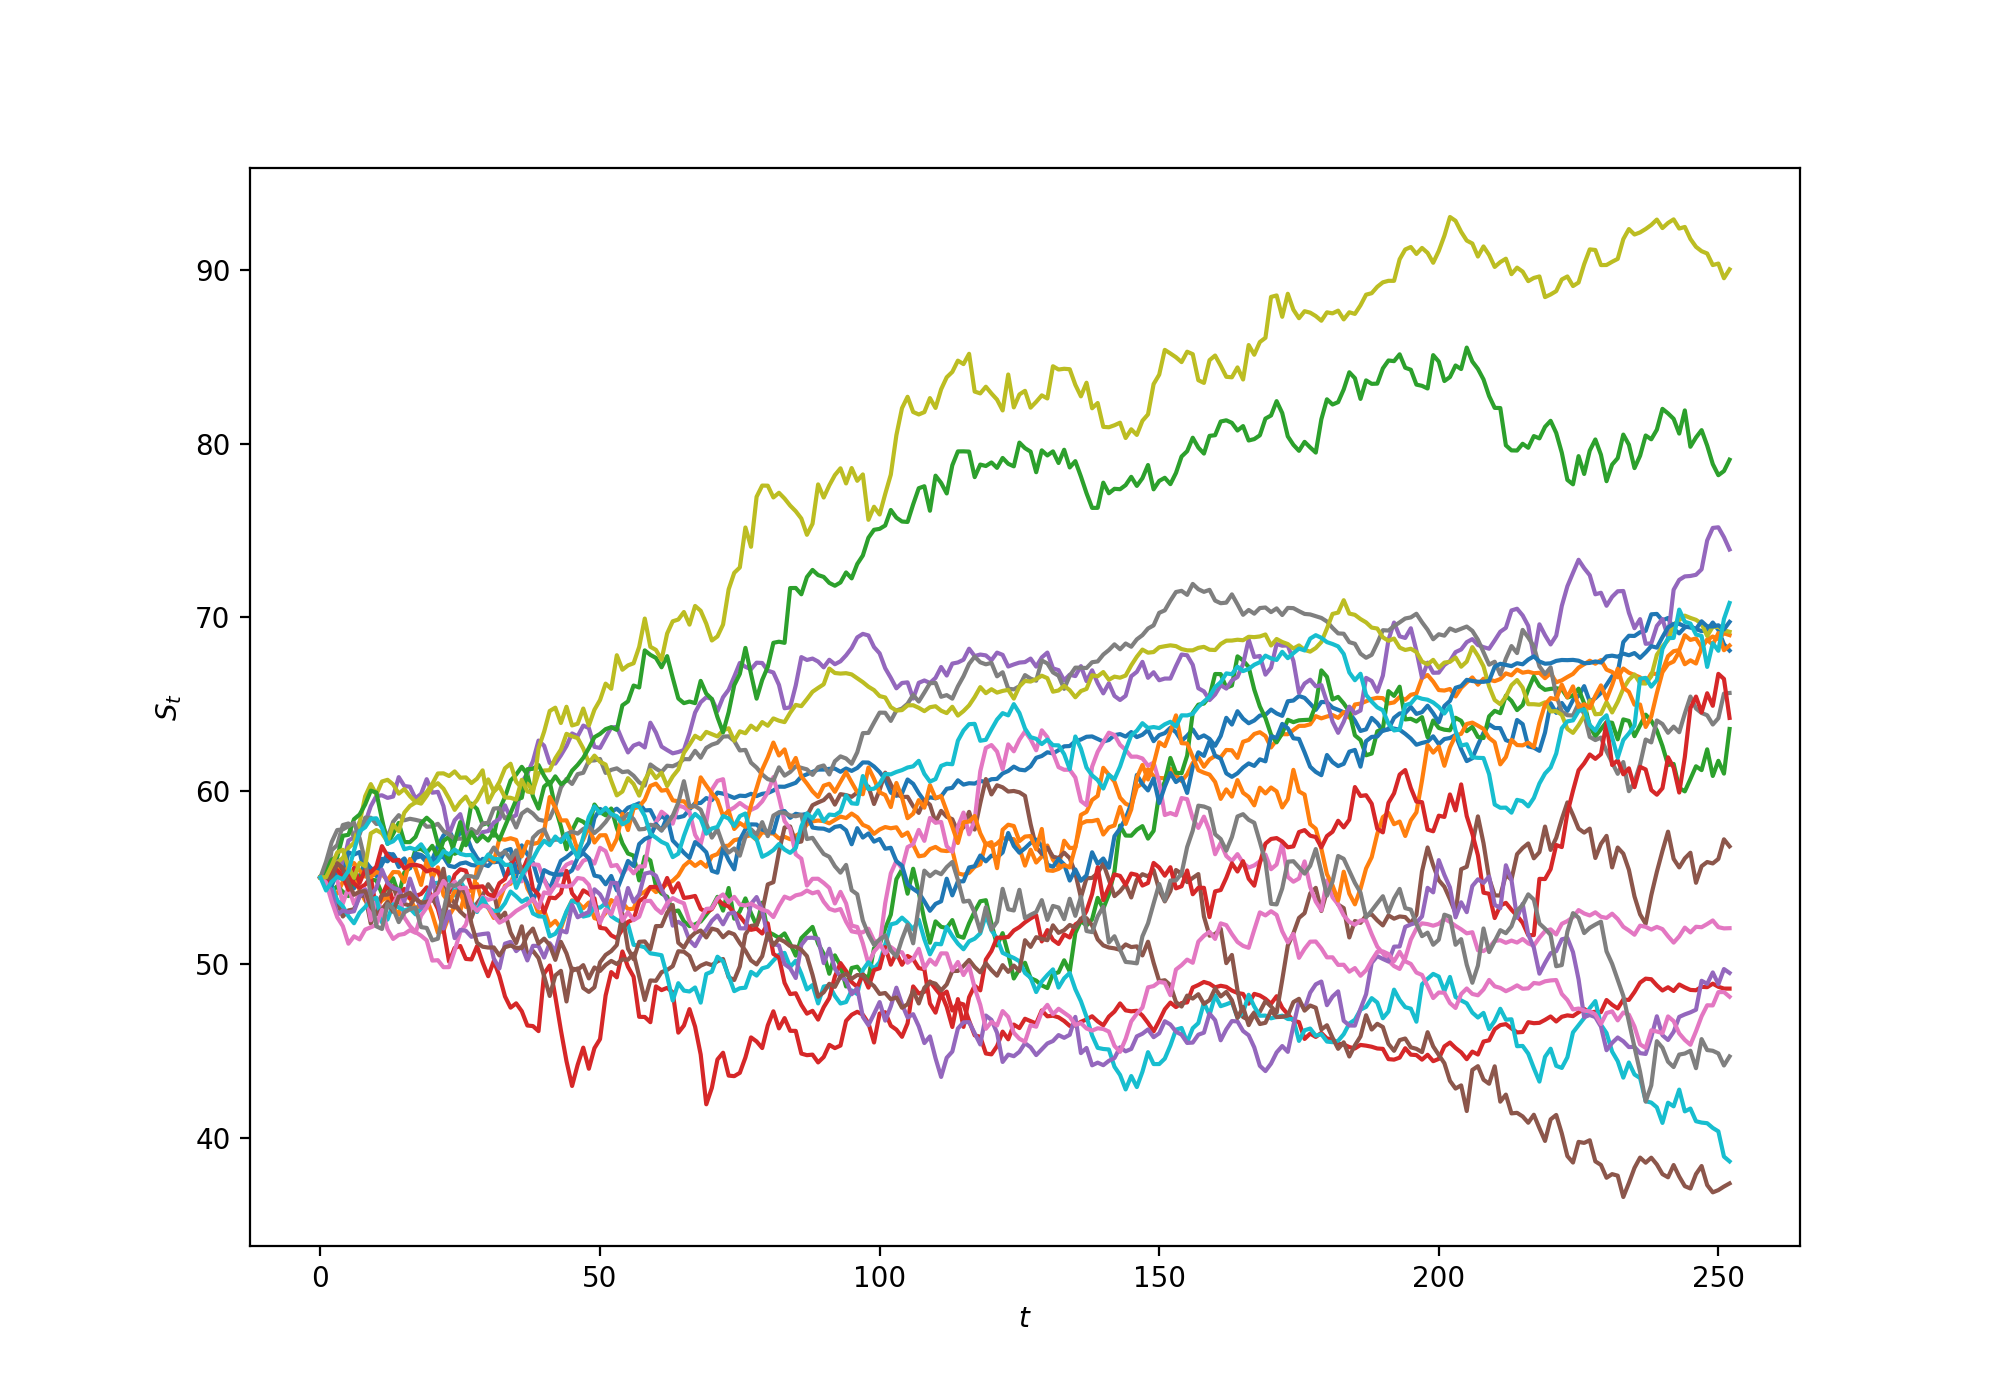

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1           # maturity
S0 = 55         # spot price
K = 50          # strike price
r = 0.04        # risk-free interest rate
q = 0.02        # dividend rate
v0 = 0.04       # initial variance
rho = -0.7      # correlation between Brownian motions
kappa = 2       # mean reversion rate
theta = 0.04    # Long term mean of variance
sigma = 0.3     # volatility of volatility
n_steps = 252   # number of time steps
n_paths = 500  # number of paths
n_blocks = 200 # number of blocks
dt = T/n_steps  # time step

# Initialize arrays
Vc_list = np.zeros(n_blocks) # call array
Vp_list = np.zeros(n_blocks) # put array

for j in range(n_blocks):
    # Correlated normal random variables
    W1, W2 = np.random.multivariate_normal([0,0], [[1, rho], [rho, 1]], (n_steps, n_paths)).T
    
    # Initialize array for variance
    v = np.zeros((n_steps + 1, n_paths)).T
    v[:, 0] = v0
    
    # Initialize array for stock
    S = np.zeros((n_steps + 1, n_paths)).T
    S[:, 0] = S0
    
    # Compute the paths
    for i in range(1, n_steps + 1):
        S[:, i] = S[:, i-1] * np.exp((r - q - 0.5*v[:, i-1])*dt \
                                     + np.sqrt(v[:, i-1])*np.sqrt(dt)*W2[:, i-1])
        v[:, i] = np.abs(v[:, i-1] + kappa*(theta - v[:, i-1])*dt \
                         + sigma*np.sqrt(v[:, i-1])*np.sqrt(dt)*W1[:, i-1])
    
    # Compute the discounted option price for the block    
    Vc_list[j] = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K, 0))
    Vp_list[j] = np.exp(-r*T)*np.mean(np.maximum(K - S[:,-1], 0))

# Final option price (mean of the prices from each block)
Vc = np.mean(Vc_list)
Vp = np.mean(Vp_list)

print('Call price: ' + str(round(Vc, 5)))
print('Put price:  ' + str(round(Vp, 5)))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
for i in range(20):
    ax.plot(S[i, :])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$S_t$');

<IPython.core.display.Javascript object>


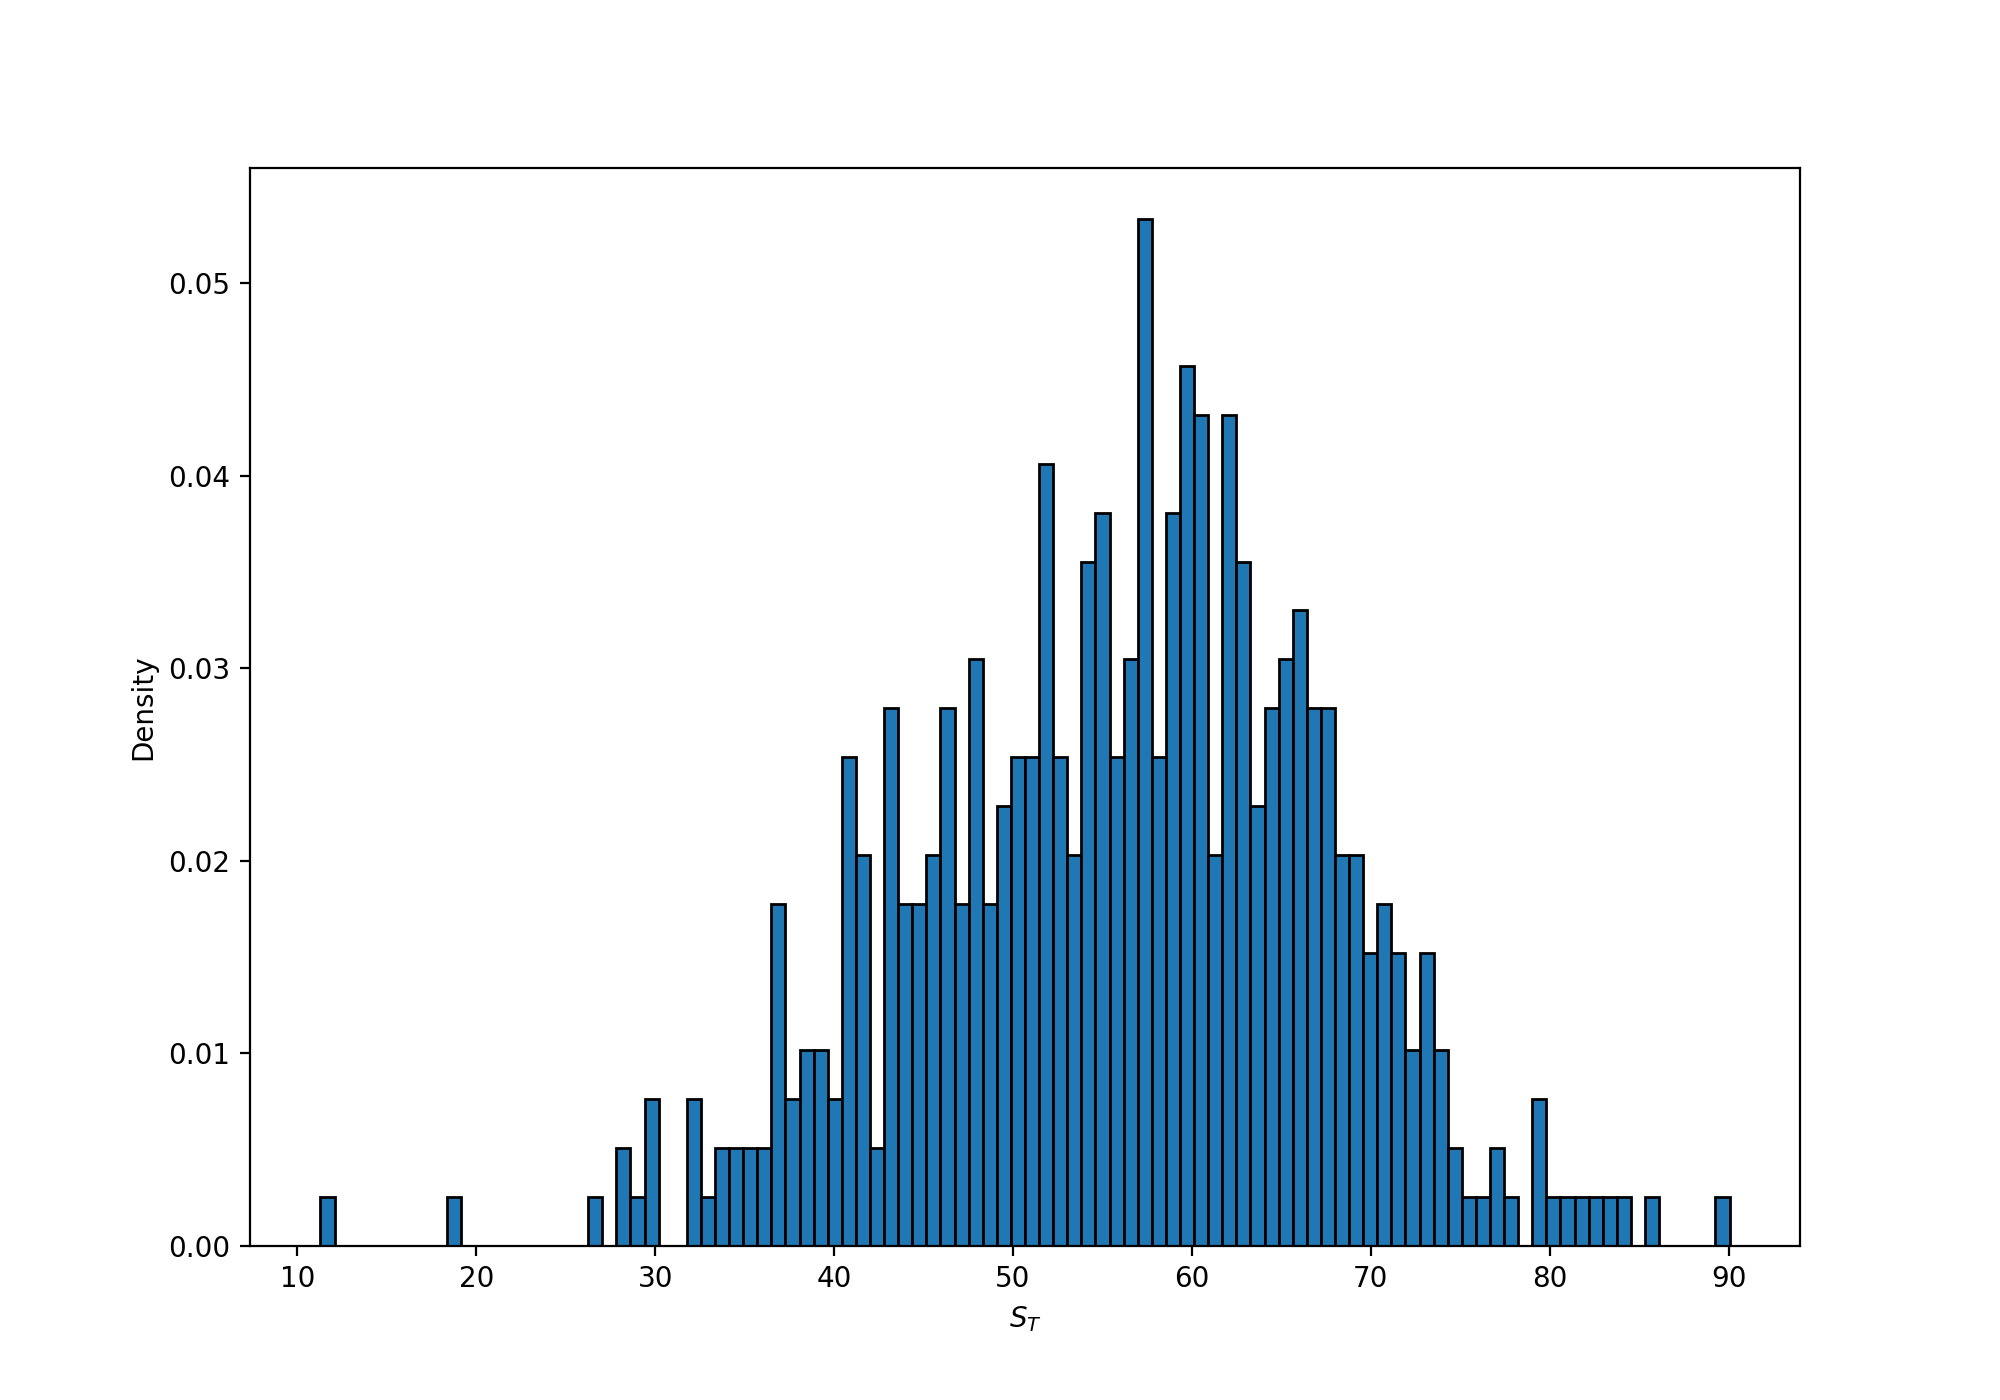

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.hist(S[:,-1], 100, density=True, ec='k')
ax.set_ylabel('Density')
ax.set_xlabel(r'$S_T$');